# T2 bacteria study

## Reload function

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

## Imports

In [3]:
import pandas as pd
from typing import List, Dict, Set
from datetime import datetime
from models import Isolate, Sample, BC_Sample, T2_Sample, Episode, Patient
import loader as load
import episodeloader as epi
from Displayer import Displayer
from Plotter import Plotter
import re
import utils as utils

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats 
from matplotlib.ticker import PercentFormatter




## import data from files

In [4]:
df_CC = load.from_excel('T2bakt_CC.xlsx')

In [5]:
df_AP = load.from_excel('T2bakt_AP.xlsx')

In [6]:
df_other = load.from_excel('T2bakt_other.xlsx')

In [7]:
df_AP_times = load.from_excel('T2_bakt_AP_times.xlsx')

In [8]:
df_CC_times = load.from_excel('T2_bakt_CC_times.xlsx')


In [9]:
df_id_times = load.from_excel('positive_bc_timestamps.xlsx')

### Main dataframes

In [10]:
dfs_toload = df_AP, df_CC, df_other

### Dataframes with times

In [11]:
dfs_times = df_AP_times, df_CC_times

### Load dataframe into patient objects

In [12]:
patients = load.patients_list(dfs_toload, dfs_times, df_id_times)

Total of 631 patients


In [13]:
### config time frames: 

bc_window = 72
other_sample_window = 72
cooldown_days = 7

In [14]:
epi.create_episodes(patients, bc_window = bc_window, other_sample_window = other_sample_window, direction="both")

Total number of patients: 631
Populated patients list with 843 episodes


## Exclusions (returns patients or episodes that are excluded

In [18]:
excluded_recurrent_episodes = epi.exclude_recurrent_episodes(patients,cooldown_days)

102 episodes with prior T2 within 7 days


In [19]:
excluded_invalidT2_episodes = epi.exclude_invalid_episodes(patients)

2 episodes with completely invalid T2 results excluded


In [20]:
empty_excluded = epi.exclude_empty_episodes(patients)

99 episodes with no BC samples excluded


In [21]:
patients_without_valid_episodes = epi.exclude_patients(patients)

87 patients with no valid episodes (T2 sample without BCs) excluded


## Create Displayer for tabular data

In [22]:
displayer = Displayer(patients)

Total patients: 544
Total episodes: 640
Total samples: 16721 (note that this is all samples, not only within episodes


In [23]:
plotter = displayer.get_plotter()

In [78]:
displayer.tat_df()

AttributeError: 'NoneType' object has no attribute 'total_seconds'

## Results

i = 0
cool_down = 7
for i in range(0,15):
    print(i*24)
    patients = load.patients_list(dfs_toload, dfs_times)
    epi.create_episodes(patients, bc_window = (i * 24), other_sample_window = (i*24), direction="both")
    excluded_recurrent_episodes = epi.exclude_recurrent_episodes(patients, cool_down)
    excluded_invalidT2_episodes = epi.exclude_invalid_episodes(patients)
    empty_excluded = epi.exclude_empty_episodes(patients)
    patients_without_valid_episodes = epi.exclude_patients(patients)
    displayer = Displayer(patients)
    displayer.episode_classification("BC_IN_PANEL") 
    i += 1
    if i>3:
        cool_down = i*2
    



In [79]:
displayer.display_most_common_bacteria_in_episodes(is_t2included = False)

Most Common Bacteria in BC samples
	Staphylococcus aureus: 24
	Escherichia coli: 16
	Enterococcus faecium: 15
	Candida albicans: 8
	Klebsiella pneumoniae: 6
	Streptococcus mitis/sanguinis gruppen: 5
	Pseudomonas aeruginosa: 4
	Enterococcus faecalis: 4
	Gramnegativ stav: 3
	Candida glabrata: 3
	Sphingomonas paucimobilis: 3
	Candida tropicalis: 3
	Acinetobacter non-baumannii: 2
	Stenotrophomonas maltophilia: 2
	Enterobacter cloacae: 2
	Fusarium species: 2
	Streptococcus pneumoniae (Pneumokock): 2
	Grampositiv kock: 1
	Saccharomyces cerevisiae: 1
	Neisseria species: 1
	Enterococcus avium: 1
	Hafnia alvei: 1
	Achromobacter xylosoxidans: 1
	Klebsiella (Enterobacter) aerogenes: 1
	Fusobacterium species: 1
	Candida parapsilosis: 1
	Prevotella species: 1
	Haemophilus species: 1
	Macrococcus species: 1
	Bacteroides fragilis gruppen: 1
	Citrobacter freundii: 1
	Sphingomonas species: 1
	Gemella species: 1
	Salmonella Typhi: 1
	Candida pelliculosa (syn.Hansenula anomala): 1
	Betahemolyserande stre

In [80]:
displayer.get_mean_time_between_samples() #between t2 and bc

Mean: 43.93492501528351, Median: 31.208333333333332, IQR: 77.30395833333333, SD: 43.12394587897763


In [235]:
displayer.display_aggregate_data() ### Demographic data

Aggregate Data:
Total no of patients: 544
Age
Mean age: 57.279411764705884
Min age: 0
Max age: 94
Standard deviation of age: 19.76
Gender
No. of males: 329 (60.48%)
No. of females: 215 (39.52%)
Episodes
Total number of episodes: 640
	478 patients had 1 episodes
	46 patients had 2 episodes
	13 patients had 3 episodes
	5 patients had 4 episodes
	1 patients had 5 episodes
	1 patients had 6 episodes
Samples
Total no of T2 samples: 640
Total no of BC samples: 2117
Total no of other samples: 1119
Episodes where T2 was taken in ICU: 116 (18.12)
Episodes by number of BC samples
	115 episodes had 1 BC samples
	174 episodes had 2 BC samples
	133 episodes had 3 BC samples
	82 episodes had 4 BC samples
	53 episodes had 5 BC samples
	31 episodes had 6 BC samples
	52 episodes had more than 6 BC samples
Episodes by number of other samples
	162 episodes had 0 other samples
	198 episodes had 1 other samples
	136 episodes had 2 other samples
	58 episodes had 3 other samples
	39 episodes had 4 other samp

In [82]:
displayer.get_other_sample_locales(group = "all")

Locale: Urine, Count: 459 (40.26%)
Locale: Lower respiratory tract, Count: 241 (21.14%)
Locale: Deep wound/abcess/drainage, Count: 158 (13.86%)
Locale: Superficial wound, Count: 104 (9.12%)
Locale: Miscellaneous/Other, Count: 66 (5.79%)
Locale: Vascular catheter, Count: 60 (5.26%)
Locale: Cerebrospinal fluid, Count: 32 (2.81%)
Locale: Orthopedic, Count: 14 (1.23%)
Locale: Gynecological, Count: 5 (0.44%)
Locale: Ear/sinus, Count: 1 (0.09%)
Total samples: 1140


In [83]:
displayer.get_other_sample_locales(group = "t2neg_bcpos")

Locale: Urine, Count: 26 (53.06%)
Locale: Superficial wound, Count: 11 (22.45%)
Locale: Deep wound/abcess/drainage, Count: 4 (8.16%)
Locale: Lower respiratory tract, Count: 3 (6.12%)
Locale: Miscellaneous/Other, Count: 3 (6.12%)
Locale: Vascular catheter, Count: 2 (4.08%)
Total samples: 49


In [27]:
displayer.get_other_sample_locales(group = "t2pos_bcneg")

Locale: Urine, Count: 24 (51.06%)
Locale: Lower respiratory tract, Count: 7 (14.89%)
Locale: Superficial wound, Count: 7 (14.89%)
Locale: Deep wound/abcess/drainage, Count: 4 (8.51%)
Locale: Miscellaneous/Other, Count: 3 (6.38%)
Locale: Vascular catheter, Count: 2 (4.26%)
Total samples: 47


In [182]:
displayer.display_all_patients()

|-- Patient 679, age 31, gender 1
	 |-- Episode # 0, T2 date: 2022-07-14 08:19:00, classification: T2_NEG_COMPARISON_POS
Isolates found in BC samples: Escherichia coli
		 |-- Sample Id 22CC100415, date: 2022-07-14 08:19:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: None
			 |-- All results valid
		 |-- Sample Id 22AP136075, date: 2022-07-14 08:19:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: 0 days 09:54:37
			 |-- Isolate: Escherichia coli, Relevant, In T2 panel
		 |-- Sample Id 22AP136181, date: 2022-07-14 18:56:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: 0 days 14:17:18
			 |-- Isolate: Escherichia coli, Relevant, In T2 panel
		 |-- Sample Id 22AC147918, date: 2022-07-15 09:56:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: None
			 |-- Specimen locale: Urine
	 |-- Episode # 2, T2 date: 2022-09-23 18:35:00, classification: ALL_NEG
		 |-- Sample Id 22CC100643, date:

In [29]:
displayer.display_specific_isolates("Pseudomonas aeruginosa")

	 |-- Episode # 56, T2 date: 2023-08-21 16:29:00, classification: BOTH_POS_MATCH
Isolates found in T2 samples: Pseudomonas aeruginosa
Isolates found in BC samples: Pseudomonas aeruginosa
Isolates found in other samples: Pseudomonas aeruginosa, Enterococcus faecium
		 |-- Sample Id 23CC100842, date: 2023-08-21 16:29:00, clinic: Karolinska H Vårdavdelning CAST VE, time to prel report: 1 days 16:08:09
			 |-- Isolate: Pseudomonas aeruginosa, Relevant, In T2 panel
			 |-- All results valid
		 |-- Sample Id 23AP144304, date: 2023-08-21 12:48:00, clinic: Karolinska H Akutmottagning 1 VE, time to prel report: 0 days 22:58:27
			 |-- Isolate: Pseudomonas aeruginosa, Relevant, In T2 panel
		 |-- Sample Id 23AP144307, date: 2023-08-21 13:00:00, clinic: Karolinska H Akutmottagning 1 VE, time to prel report: 0 days 22:45:31
			 |-- Isolate: Pseudomonas aeruginosa, Relevant, In T2 panel
		 |-- Sample Id 23AP144312, date: 2023-08-21 12:47:00, clinic: Karolinska H Akutmottagning 1 VE, time to prel re

In [ ]:
displayer.count_polymicrobials("bc")

In [ ]:
displayer.calculate_sensitivity_specificity()

In [234]:
displayer.positivity_count() 

Any positive episodes: 129
Any positive episodes with bacteria in panel: 101
T2 positive episodes: 75
BC positive (in-panel): 55
BC positive (all relevant): 87
positive BC samples (in-panel): 120


In [ ]:
displayer.calculate_sensitivity_specificity_bacteria()


In [ ]:
52/(3297+41+29+23)

In [ ]:
displayer.display_specific_isolates(isolate_name = "Staphylococcus aureus")

In [ ]:
displayer.episode_classification("ALL_BC") 

In [282]:
displayer.episode_classification("BC_IN_PANEL") 

[[29, 46], [26, 539]]

Episode Classification Summary:
T2 Neg Comparison Pos: 26
All Neg: 539
Both Pos Match: 27
T2 Pos Comparison Neg: 46
Comparison Subset Of T2: 1
T2 Subset Of Comparison Set: 1

McNemar's Test Result:
Statistic: 5.555555555555555, P-value: 0.01842212545409897



In [ ]:
df_poly_out_of_panel= displayer.polymicrobial_not_only_panel()

In [ ]:
df_poly_out_of_panel.to_excel("polymicrobial_episodes.xlsx", index=False)

In [51]:
displayer.discordant_results("BC_IN_PANEL", "T2_POS_COMPARISON_NEG")

	 |-- Episode # 14, T2 date: 2023-03-16 14:08:00, classification: T2_POS_COMPARISON_NEG
Isolates found in T2 samples: Escherichia coli, Enterococcus faecium
		 |-- Sample Id 23CC100308, date: 2023-03-16 14:08:00, clinic: Karolinska H Geriatrisk akutvårdsavdelning GAVA VE, time to prel report: 0 days 19:33:19
			 |-- Isolate: Escherichia coli, Relevant, In T2 panel
			 |-- Isolate: Enterococcus faecium, Relevant, In T2 panel
			 |-- All results valid
		 |-- Sample Id 23AP114088, date: 2023-03-13 17:07:00, clinic: Aleris ASIH Botkyrka  område 3, time to prel report: None
		 |-- Sample Id 23AP114091, date: 2023-03-13 17:07:00, clinic: Aleris ASIH Botkyrka  område 3, time to prel report: None
		 |-- Sample Id 23AP114530, date: 2023-03-15 15:53:00, clinic: Karolinska H  Akutmottagning 2 VE, time to prel report: None
		 |-- Sample Id 23AP114535, date: 2023-03-15 16:45:00, clinic: Karolinska H  Akutmottagning 2 VE, time to prel report: None
		 |-- Sample Id 23AP114611, date: 2023-03-16 06:02:

In [ ]:
displayer.tat() ## Get turnaround times

In [114]:
displayer.discordant_check_other_samples() ## Shows cases where T2 pos, BC neg, and other samples shares at least one T2 isolate element with T2.

|------Total T2 positive: 46
Total count of episodes where T2 is positive but BC is negative and no other samples were taken: 11
Total count of episodes where T2 is positive, BC is negative, and other samples are positive: 8
Total count of episodes where T2 is positive, BC is negative, and other samples are negative: 27
|------Total BC positive: 26
Total count of episodes where BC is positive but T2 is negative and no other samples were taken: 4
Total count of episodes where BC is positive, T2 is negative, and other samples are positive: 13
Total count of episodes where BC is positive, T2 is negative, and other samples are negative: 9
|------Total both T2 and BC positive: 29
Total count of episodes where both T2 and BC are positive and no other samples were taken: 9
Total count of episodes where both T2 and BC are positive and other samples are negative: 5
Total count of episodes where both T2 and BC are positive and other samples are positive: 15
Chi2 Stat for T2 vs BC with Other Samp

In [244]:
for episode in episodes:
    episode.display()

	 |-- Episode # 0, T2 date: 2022-07-14 08:19:00, classification: T2_NEG_COMPARISON_POS
Isolates found in BC samples: Escherichia coli
		 |-- Sample Id 22CC100415, date: 2022-07-14 08:19:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: None
			 |-- All results valid
		 |-- Sample Id 22AP136075, date: 2022-07-14 08:19:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: 0 days 09:54:37
			 |-- Isolate: Escherichia coli, Relevant, In T2 panel
		 |-- Sample Id 22AP136181, date: 2022-07-14 18:56:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: 0 days 14:17:18
			 |-- Isolate: Escherichia coli, Relevant, In T2 panel
		 |-- Sample Id 22AC147918, date: 2022-07-15 09:56:00, clinic: Karolinska H Vårdavdelning Infektion 2 VE, time to prel report: None
			 |-- Specimen locale: Urine
	 |-- Episode # 2, T2 date: 2022-09-23 18:35:00, classification: ALL_NEG
		 |-- Sample Id 22CC100643, date: 2022-09-23 18:35:00, clinic: Karo

## Difference in concordance/discordance depending on time

In [24]:
samples= displayer.samples

In [25]:
episodes = displayer.episodes.values()


In [26]:
concordance=[]
time_diff=[]

for episode in episodes:
    for bc_sample in episode.bc_samples:
        time_diff_h = abs(bc_sample.sample_date-episode.t2_sample.sample_date).total_seconds()/3600
        conc = bc_sample.get_t2panel_isolates() == episode.t2_sample.isolates
        concordance.append(conc)
        time_diff.append(time_diff_h)

In [110]:
import pandas as pd
episode_types = []
t2_isolates = []
bc_isolates = []
bc_numbers = []
other_numbers = []
other_isolates = []

for episode in episodes:
    if episode.classify(compare_with= "BC_IN_PANEL") == "T2_POS_COMPARISON_NEG":
        episode_types.append("T2 pos, BC neg")
    elif episode.classify(compare_with= "BC_IN_PANEL") == "T2_NEG_COMPARISON_POS":
        episode_types.append("T2 neg, BC pos")
    else: episode_types.append("other")
    t2_iso = []
    bc_iso = []
    other_iso = []
    
    for isolate in episode.t2_sample.isolates:
        t2_iso.append(isolate.name)

    for sample in episode.bc_samples:
        for isolate in sample.isolates:
            bc_iso.append(isolate.name)
    
    for sample in episode.other_samples:
        for isolate in sample.isolates:
            other_iso.append(isolate.name)
    
    # Join isolates into a string separated by commas
    t2_isolates.append(', '.join(set(t2_iso)))
    bc_isolates.append(', '.join(set(bc_iso)))
    other_isolates.append(', '.join(set(other_iso)))
    bc_numbers.append(len(episode.bc_samples))
    other_numbers.append(len(episode.other_samples))

# Create DataFrame
df_table = pd.DataFrame({
    "Episode type": episode_types,
    "T2 isolates": t2_isolates,
    "BC samples": bc_numbers,
    "BC isolates": bc_isolates,
    "Other samples": other_numbers,
    "Other isolates": other_isolates,
})


In [111]:
# Create a dictionary of replacements
replacements = {
    "Jästsvamp": "Yeast, unspecified",
    "Betahemolyserande streptokock grupp G": "Group G streptococci",
    "Koagulas-negativ stafylokock": "Coagulase negative staphylococci",
    "Gramnegativ stav": "Gram-negative rod",
    "Betahemolyserande streptokock grupp A": "Group A streptococci",
    "Blandflora": "Mixed flora",


    # Add more replacements as needed
}

# List of columns to apply replacements in
columns_to_update = ['T2 isolates', 'BC isolates', 'Other isolates']

# Applying replacements across the specified columns
for column in columns_to_update:
    # Using regex=True allows for partial replacements within strings
    df_table[column] = df_table[column].replace(replacements, regex=True)

# This will update your DataFrame with all the specified replacements in the defined columns


In [112]:
df_table[df_table["Episode type"] == "T2 pos, BC neg"].to_excel("T2_pos_BC_neg.xlsx", index=False)


In [113]:
df_table[df_table["Episode type"] == "T2 neg, BC pos"].to_excel("T2_neg_BC_pos.xlsx", index=False)  

In [28]:
sample_time = []
category = []
for episode in episodes:
    for bc_sample in episode.bc_samples:
        time = (bc_sample.sample_date-episode.t2_sample.sample_date).total_seconds()/3600
        sample_time.append(time)


        if bc_sample.get_t2panel_isolates() == episode.t2_sample.isolates:
            category.append('concordant')
        elif bc_sample.get_t2panel_isolates() and not episode.t2_sample.isolates:
            category.append('t2_neg_bc_pos')
        elif not bc_sample.get_t2panel_isolates() and episode.t2_sample.isolates:
            category.append('t2_pos_bc_neg')
        else:
            category.append('discordant_unclassified')
            episode.display()
            print("bc_samples---------------------------------------")
            bc_sample.display()
        

	 |-- Episode # 314, T2 date: 2022-12-24 04:23:00, classification: COMPARISON_SUBSET_OF_T2
Isolates found in T2 samples: Klebsiella pneumoniae, Enterococcus faecium
Isolates found in BC samples: Enterococcus faecium
		 |-- Sample Id 22CC101006, date: 2022-12-24 04:23:00, clinic: Karolinska H Vårdavdelning CAST VE, time to prel report: 0 days 08:41:51
			 |-- Isolate: Klebsiella pneumoniae, Relevant, In T2 panel
			 |-- Isolate: Enterococcus faecium, Relevant, In T2 panel
			 |-- All results valid
		 |-- Sample Id 22AP167705, date: 2022-12-24 02:42:00, clinic: Karolinska H Vårdavdelning CAST VE, time to prel report: 0 days 13:18:24
			 |-- Isolate: Enterococcus faecium, Relevant, In T2 panel
		 |-- Sample Id 22AP167707, date: 2022-12-24 02:42:00, clinic: Karolinska H Vårdavdelning CAST VE, time to prel report: 0 days 13:16:52
			 |-- Isolate: Enterococcus faecium, Relevant, In T2 panel
		 |-- Sample Id 22AP167708, date: 2022-12-24 02:44:00, clinic: Karolinska H Vårdavdelning CAST VE, ti

In [29]:
data = pd.DataFrame({'time':sample_time, 'category':category})

In [30]:



# Calculate the minimum and maximum to ensure all data is covered
min_time = -bc_window
max_time = bc_window

bin_step = 12

bin_start = min_time
print(max_time)
bin_edges = np.arange(bin_start-bin_step/2, max_time + bin_step,bin_step)
# Adjust the last bin edge to fit exactly at max_time if necessary

print(bin_edges[-1],bin_edges[0])
bin_edges[-1] = max_time


bin_edges[0] = min_time

data['time_bin'] = pd.cut(data['time'], bins=bin_edges, right=False)  # right=False makes intervals left-closed, right-open

# Check the bins created to ensure alignment
print(bin_edges)
print(data['time_bin'].unique())

72
78.0 -78.0
[-72. -66. -54. -42. -30. -18.  -6.   6.  18.  30.  42.  54.  66.  72.]
[[-6.0, 6.0), [6.0, 18.0), [-18.0, -6.0), [42.0, 54.0), [-42.0, -30.0), ..., [-72.0, -66.0), [-30.0, -18.0), [54.0, 66.0), [-54.0, -42.0), [-66.0, -54.0)]
Length: 13
Categories (13, interval[float64, left]): [[-72.0, -66.0) < [-66.0, -54.0) < [-54.0, -42.0) < [-42.0, -30.0) ... [30.0, 42.0) < [42.0, 54.0) < [54.0, 66.0) < [66.0, 72.0)]


## Main fig: sampling in relationship to T2

/var/folders/qt/l0dyn_r92m9clbtf34655cjr0000gn/T/ipykernel_87664/2459257728.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data.groupby(['formatted_time_bin', 'category']).size().unstack(fill_value=0)
/var/folders/qt/l0dyn_r92m9clbtf34655cjr0000gn/T/ipykernel_87664/2459257728.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_per_bin = data.groupby('formatted_time_bin').size()


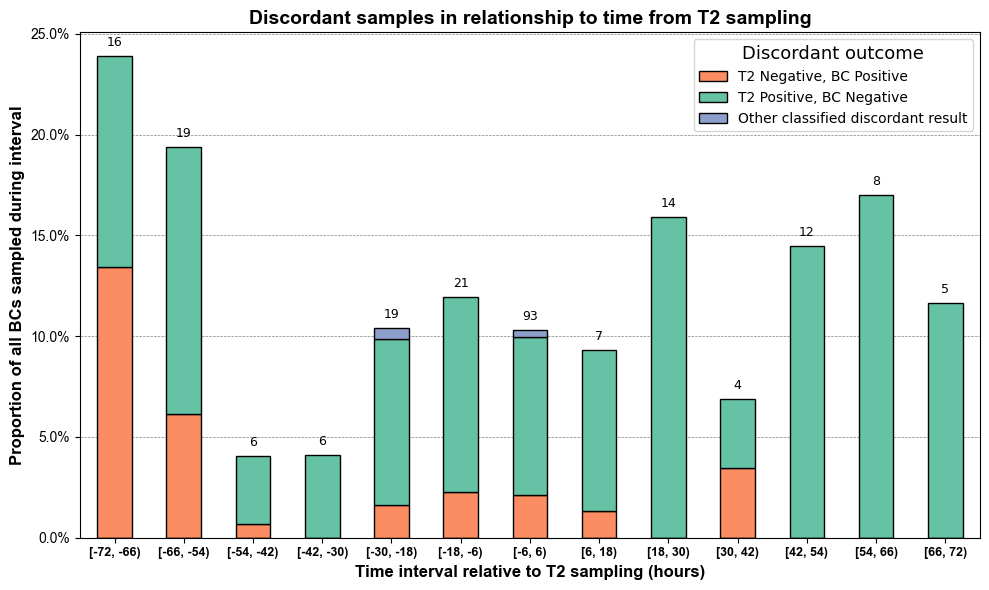

In [31]:

# Count of each category within each bin
data['formatted_time_bin'] = data['time_bin'].apply(Displayer.format_interval)
count_data = data.groupby(['formatted_time_bin', 'category']).size().unstack(fill_value=0)

# Total counts in each bin, including 'concordant'
total_counts_per_bin = data.groupby('formatted_time_bin').size()
# Convert counts to percentages

percentage_data = count_data.divide(total_counts_per_bin, axis=0) * 100
# Optionally, exclude 'concordant' from visualization
percentage_data = percentage_data[['t2_neg_bc_pos', 't2_pos_bc_neg', 'discordant_unclassified']]
summed_percentage = percentage_data.sum(axis=1)
discordant_totals = count_data[['t2_neg_bc_pos', 't2_pos_bc_neg', 'discordant_unclassified']].sum(axis=1)


# Plotting the data
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#fc8d62', '#66c2a5', '#8da0cb'], edgecolor='black')

# Setting labels and title with styling
ax.set_xlabel("Time interval relative to T2 sampling (hours)", fontsize=12, fontweight='bold',fontname='Arial')
ax.set_ylabel("Proportion of all BCs sampled during interval", fontsize=12, fontweight='bold',fontname='Arial')
ax.set_title("Discordant samples in relationship to time from T2 sampling", fontsize=14, fontweight='bold', fontname='Arial')

# Customizing the tick labels
plt.xticks(rotation=0, fontsize=9, ha='center',fontweight='bold',fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')

# Styling the legend
legend = plt.legend(title='Discordant outcome', 
                    fontsize=10, title_fontsize='13', 
                    labels=['T2 Negative, BC Positive', 'T2 Positive, BC Negative', 'Other classified discordant result'] )



# Optional: Customizing the grid
ax.set_axisbelow(True)  # Ensure grid is below bar layers
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.set_major_formatter(PercentFormatter(100))  # Format y-axis as percentages







# Annotating the total counts above each bar stack
for idx, (label, discordant_total) in enumerate(zip(percentage_data.index, discordant_totals)):
    # Get the y-coordinate as the top of the bar stack (total percentage of discordant categories)
    total_percentage = percentage_data.loc[label].sum()
    # Place the annotation above the last segment of the bar stack
    ax.annotate(f'{discordant_total}', xy=(idx, total_percentage), xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, color='black')
# Show the plot
plt.grid(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust subplots to give some padding
panel_b = plt.gcf()
plt.show()



In [174]:
## Fig with counts instead of percentage

# data['simplified_category'] = data['category'].apply(lambda x: 'Discordant' if x in ['t2_neg_bc_pos', 't2_pos_bc_neg', 'discordant_unclassified'] else x)
# # Now group by this new category along with the time_bin
# data['formatted_time_bin'] = data['time_bin'].apply(Displayer.format_interval)
# grouped_data = data.groupby(['formatted_time_bin', 'simplified_category']).size().unstack(fill_value=0)


# # Plotting the data
# fig, ax = plt.subplots(figsize=(10, 6))
# grouped_data.plot(kind='bar', stacked=True, color=['black','white'], ax=ax, edgecolor='black')

# # Setting labels and title with styling
# ax.set_xlabel("Time period relative to T2 sampling (interval of hours)", fontsize=12, fontweight='bold',fontname='Arial')
# ax.set_ylabel("BCs sampled", fontsize=12, fontweight='bold',fontname='Arial')
# ax.set_title("Blood cultures sampled in relationship to T2 sampling", fontsize=14, fontweight='bold', color='black', fontname='Arial')

# # Customizing the tick labels
# plt.xticks(rotation=0, fontsize=8, ha='center')
# plt.yticks(fontsize=10)
# plt.legend(title='BC outcome', fontsize=10, title_fontsize='13', loc='upper right', labels=['Discordant','Concordant'], reverse = True)

# # Customizing the grid
# ax.set_axisbelow(True)  # Ensure grid is below bar layers
# ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

# # Annotating the total counts above each bar
# for idx, value in enumerate(total_counts_per_bin):
#     ax.annotate(f'{value}', xy=(idx, value), xytext=(0,3), textcoords="offset points",
#                 ha='center', va='bottom', fontsize=9, color='black')

# # Show the plot
# plt.tight_layout()  # Adjust subplots to give some padding

# plt.show()


/var/folders/qt/l0dyn_r92m9clbtf34655cjr0000gn/T/ipykernel_84452/2197449141.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['formatted_time_bin', 'simplified_category']).size().unstack(fill_value=0)


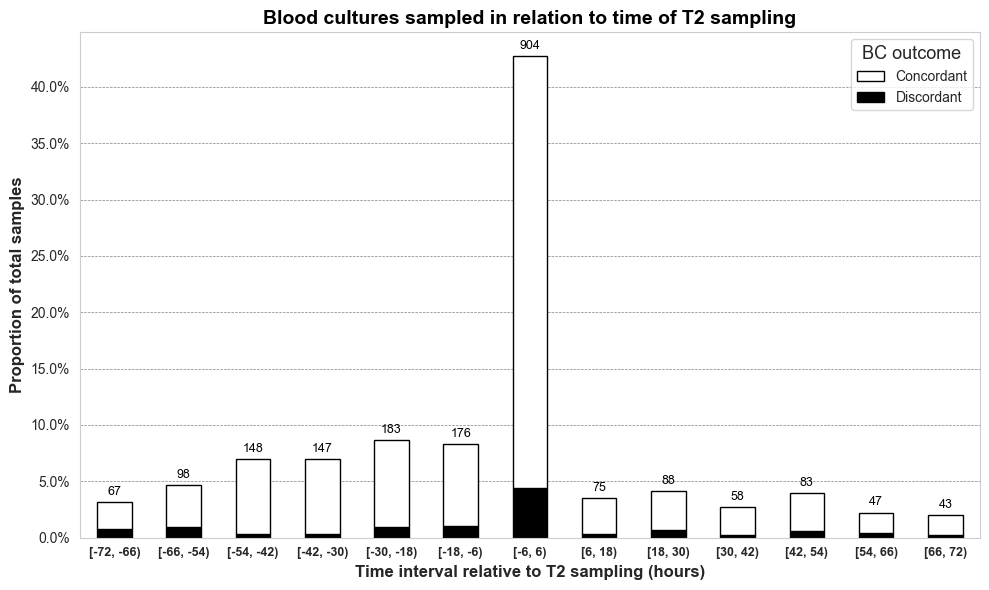

In [178]:
# Assuming 'data' is already defined and includes 'category' and 'time_bin' columns

# Simplifying the category
data['simplified_category'] = data['category'].apply(lambda x: 'Discordant' if x in ['t2_neg_bc_pos', 't2_pos_bc_neg', 'discordant_unclassified'] else x)

# Formatting the time bins (Assuming Displayer.format_interval is defined)
data['formatted_time_bin'] = data['time_bin'].apply(Displayer.format_interval)

# Group by the new category and formatted time_bin, then normalize
grouped_data = data.groupby(['formatted_time_bin', 'simplified_category']).size().unstack(fill_value=0)
normalized_grouped_data = grouped_data.divide(len(data))  # Normalize to total count to show proportions

# Plotting the normalized data
fig, ax = plt.subplots(figsize=(10, 6))
normalized_grouped_data.plot(kind='bar', stacked=True, color=['black','white'], ax=ax, edgecolor='black')

# Setting labels and title with styling
ax.set_xlabel('Time interval relative to T2 sampling (hours)', fontsize=12, fontweight='bold', fontname='Arial')
ax.set_ylabel("Proportion of total samples", fontsize=12, fontweight='bold', fontname='Arial')
ax.set_title("Blood cultures sampled in relation to time of T2 sampling", fontsize=14, fontweight='bold', color='black', fontname='Arial')

# Customizing the tick labels and grid
plt.xticks(rotation=0, fontsize=9, ha='center', fontweight='bold', fontname='Arial')
plt.yticks(fontsize=10, fontname='Arial')
ax.yaxis.set_major_formatter(PercentFormatter(1))  # Format y-axis as percentages

plt.legend(title='BC outcome', fontsize=10, title_fontsize='13', loc='upper right', labels=['Discordant', 'Concordant'], reverse=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

# Annotating the total counts above each bar
total_counts_per_bin = grouped_data.sum(axis=1)  # Total counts per bin
for idx, count in enumerate(total_counts_per_bin):
    ax.annotate(f'{int(count)}', xy=(idx, normalized_grouped_data.iloc[idx].sum()), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=9, color='black')
plt.grid(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
panel_a = plt.gcf()
plt.show()


In [181]:
#Plotter.saveplot_tofile(panel_a, name = "panel_a", format = "svg")
Plotter.saveplot_tofile(panel_b, name = "panel_b", format = "svg")

svg


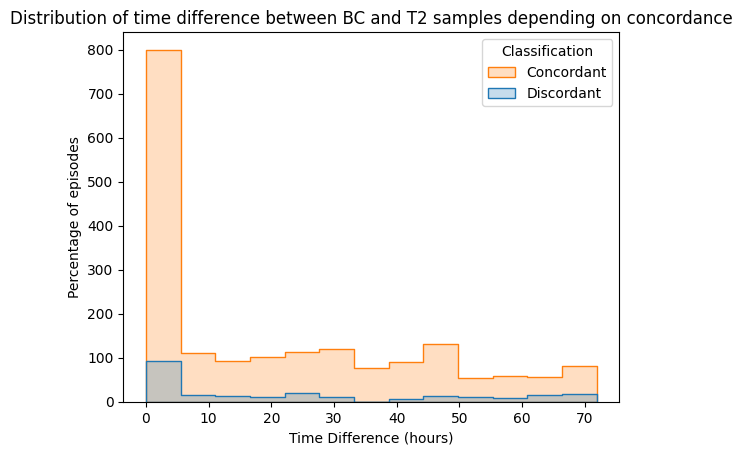

In [151]:
data = pd.DataFrame({
    'Concordance': concordance,
    'TimeDiff': time_diff
})
sns.histplot(data=data, x='TimeDiff', hue='Concordance', element='step', stat='count', common_norm=False)
plt.title('Distribution of time difference between BC and T2 samples depending on concordance')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Percentage of episodes')
plt.legend(title='Classification', labels=['Concordant', 'Discordant'])
plt.show()

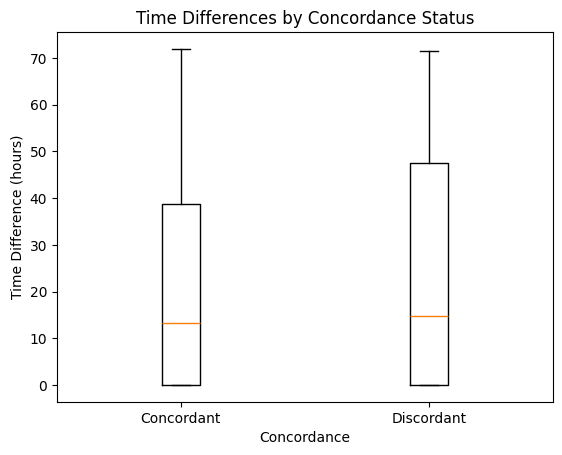

In [50]:
plt.boxplot([np.array(time_diff)[np.array(concordance)], np.array(time_diff)[~np.array(concordance)]], labels=['Concordant', 'Discordant'])
plt.title('Time Differences by Concordance Status')
plt.xlabel('Concordance')
plt.ylabel('Time Difference (hours)')
plt.show()


In [51]:
group1 = data[data['Concordance'] == True]['TimeDiff']
group2 = data[data['Concordance'] == False]['TimeDiff']

# Performing the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Mann-Whitney U test result: U-statistic = {u_stat}, P-value = {p_value}")


Mann-Whitney U test result: U-statistic = 204901.5, P-value = 0.16406543472406532


## Main fig: Difference in total turn around time for positive and negative T2

In [35]:
t2_samples = []

for episode in episodes:
    t2_samples.append(episode.t2_sample)


In [36]:

times = np.array([(sample.final_report_date - sample.sample_date) for sample in t2_samples])
contains_isolates = np.array([bool(sample.isolates) for sample in t2_samples])
time_hours = np.array([time.total_seconds() / 3600 for time in times] )


In [37]:
# Add intercept
time_hours_with_intercept = sm.add_constant(time_hours)

# Create logistic model and fit it
model = sm.Logit(contains_isolates, time_hours_with_intercept)
result = model.fit()

# Generate a sequence of time values over a wider range for plotting
time_values = np.linspace(time_hours.min() - 1, time_hours.max() + 1, 300)
time_values_with_intercept = sm.add_constant(time_values)

# Predict probabilities for the generated time values
predicted_probabilities = result.predict(time_values_with_intercept)
# Print the summary of the model
print(result.summary())

# Make predictions (probabilities)
predictions = result.predict(time_hours_with_intercept)
print("Predicted probabilities:", predictions)

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(time_hours, contains_isolates, color='blue', label='Data Points', zorder=2)
plt.plot(time_values, predicted_probabilities, color='red', label='Logistic Regression', linewidth=2)
plt.title('Logistic Regression Fit')
plt.xlabel('Time in Hours')
plt.ylabel('Probability of Containing Isolates')
plt.ylim(-0.1, 1.1)  # Extend y-axis to better see the bounds
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'sm' is not defined

In [38]:
time_hours = np.array(time_hours)
test_transform = np.log(time_hours)

testxx=np.random.normal(0, 1, 1000)

(array([101., 156., 259.,  33.,  44.,  17.,   2.,   4.,   9.,   0.,   4.,
          3.,   1.,   1.,   0.,   1.,   1.,   3.,   0.,   1.]),
 array([  5.02333333,  12.77469444,  20.52605556,  28.27741667,
         36.02877778,  43.78013889,  51.5315    ,  59.28286111,
         67.03422222,  74.78558333,  82.53694444,  90.28830556,
         98.03966667, 105.79102778, 113.54238889, 121.29375   ,
        129.04511111, 136.79647222, 144.54783333, 152.29919444,
        160.05055556]),
 <BarContainer object of 20 artists>)

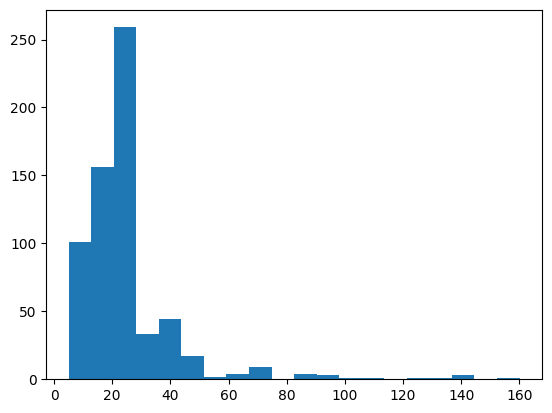

In [39]:
plt.hist(time_hours, bins=20)   

(array([101., 156., 259.,  33.,  44.,  17.,   2.,   4.,   9.,   0.,   4.,
          3.,   1.,   1.,   0.,   1.,   1.,   3.,   0.,   1.]),
 array([  5.02333333,  12.77469444,  20.52605556,  28.27741667,
         36.02877778,  43.78013889,  51.5315    ,  59.28286111,
         67.03422222,  74.78558333,  82.53694444,  90.28830556,
         98.03966667, 105.79102778, 113.54238889, 121.29375   ,
        129.04511111, 136.79647222, 144.54783333, 152.29919444,
        160.05055556]),
 <BarContainer object of 20 artists>)

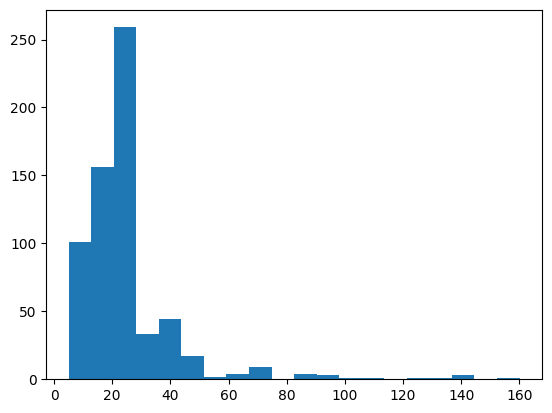

In [40]:
plt.hist(time_hours, bins=20)   

In [41]:
import matplotlib.pyplot as plt
import scipy.stats as stats 
import statsmodels.api as sm

In [42]:
# Compute the CDFs for positive and negative samples
cdf_positive = np.sort(positive_samples_time)
cdf_negative = np.sort(negative_samples_time)

# Calculate the cumulative probability for each sorted list
prob_positive = np.arange(1, len(cdf_positive) + 1) / len(cdf_positive)
prob_negative = np.arange(1, len(cdf_negative) + 1) / len(cdf_negative)

# Plot the CDFs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(cdf_positive, prob_positive, marker='.', linestyle='none', color='green')
plt.title('CDF for Positive Samples')
plt.xlabel('Time in Hours')
plt.ylabel('CDF')

plt.subplot(1, 2, 2)
plt.plot(cdf_negative, prob_negative, marker='.', linestyle='none', color='red')
plt.title('CDF for Negative Samples')
plt.xlabel('Time in Hours')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()

NameError: name 'positive_samples_time' is not defined

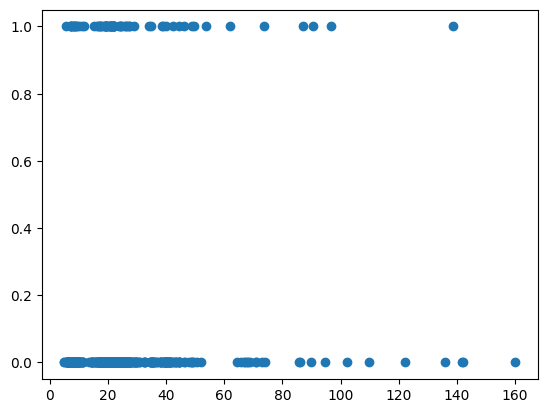

In [43]:
plt.scatter(time_hours, contains_isolates)

(array([101., 156., 259.,  33.,  44.,  17.,   2.,   4.,   9.,   0.,   4.,
          3.,   1.,   1.,   0.,   1.,   1.,   3.,   0.,   1.]),
 array([  5.02333333,  12.77469444,  20.52605556,  28.27741667,
         36.02877778,  43.78013889,  51.5315    ,  59.28286111,
         67.03422222,  74.78558333,  82.53694444,  90.28830556,
         98.03966667, 105.79102778, 113.54238889, 121.29375   ,
        129.04511111, 136.79647222, 144.54783333, 152.29919444,
        160.05055556]),
 <BarContainer object of 20 artists>)

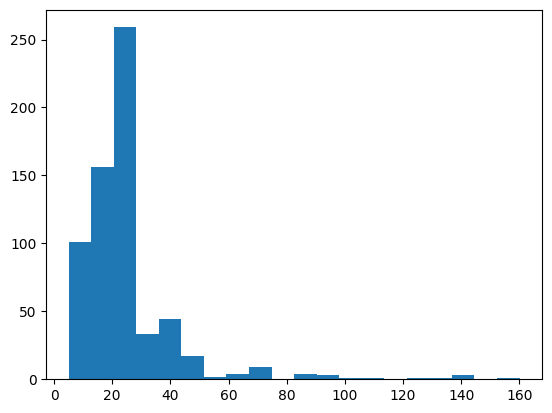

In [44]:

plt.hist(time_hours, bins = 20)

## Plots for processing time

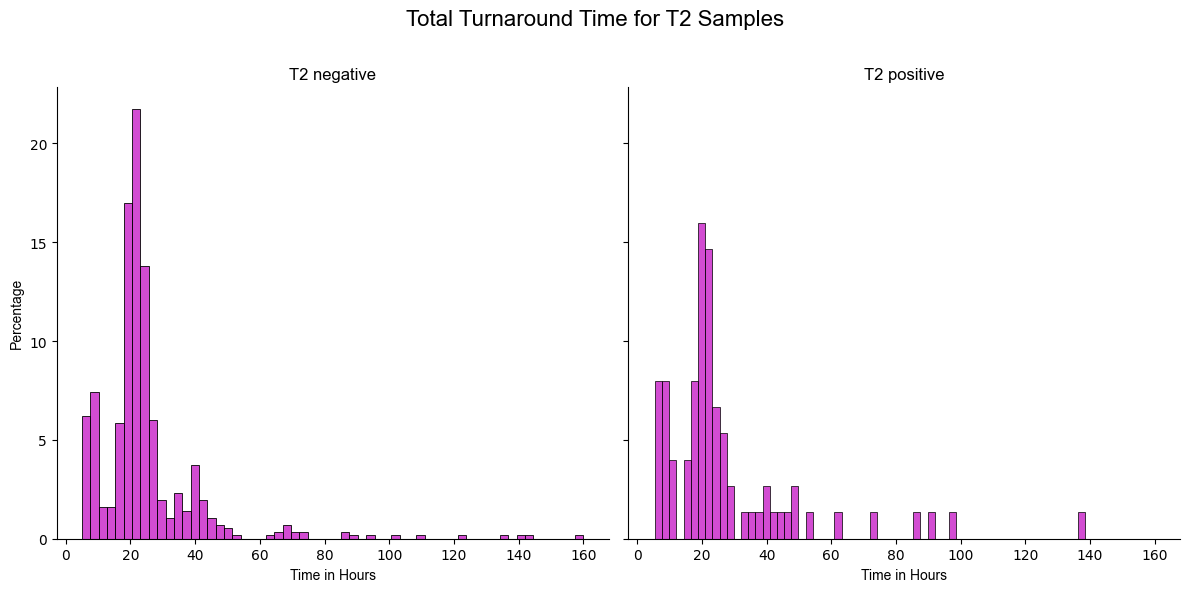

In [45]:
# Assuming time_hours and contains_isolates are defined
data = pd.DataFrame({
    'TimeHours': time_hours,
    'ContainsIsolates': contains_isolates
})

# Create the FacetGrid
g = sns.FacetGrid(data, col="ContainsIsolates", height=6, aspect=1, sharey=True, sharex=True)
g.map_dataframe(sns.histplot, x='TimeHours', bins=60, stat='percent', common_norm=False, color='m', alpha=0.7)

# Dictionary for custom titles
title_dict = {True: 'T2 positive', False: 'T2 negative'}

# Applying custom labels
for ax, col_val in zip(g.axes.flatten(), data['ContainsIsolates'].unique()):
    # Ensure we use the actual boolean values as keys
    ax.set_title(title_dict[col_val], fontname = 'Arial')
g.tight_layout()
# Setting axis labels and adjusting layout
g.set_axis_labels("Time in Hours", "Percentage",fontname = 'Arial')
g.figure.subplots_adjust(top=0.85)  # Adjust the Figure to make room for the main title
g.figure.suptitle('Total Turnaround Time for T2 Samples', fontsize=16, fontname = 'Arial')  # Main title

# Show the plots
plt.show()

## Main fig: Distributions of times T2 pos/neg

/var/folders/qt/l0dyn_r92m9clbtf34655cjr0000gn/T/ipykernel_87664/2273375684.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_data = data.groupby(['TimeBin', 'ContainsIsolates']).size().reset_index(name='Counts')


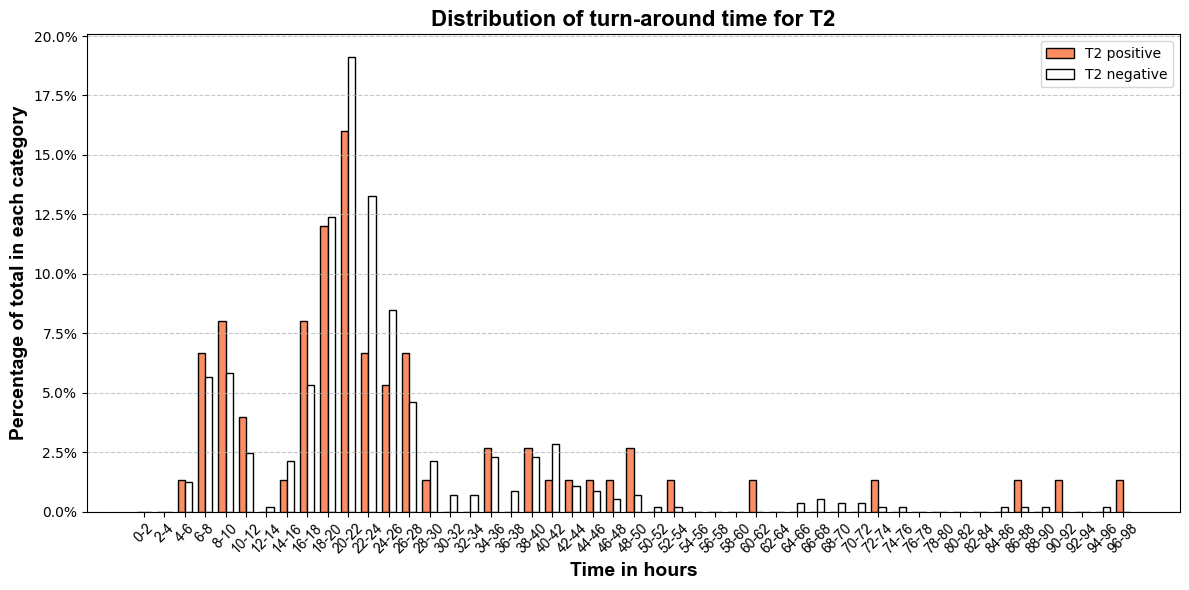

In [46]:
# Assuming time_hours and contains_isolates are defined
data = pd.DataFrame({
    'TimeHours': time_hours,
    'ContainsIsolates': contains_isolates
})

# Bin the data into hourly intervals
data['TimeBin'] = pd.cut(data['TimeHours'], bins=np.arange(0, 100, 2), right=False)

# Create a summary DataFrame
summary_data = data.groupby(['TimeBin', 'ContainsIsolates']).size().reset_index(name='Counts')
summary_data = summary_data.pivot(index='TimeBin', columns='ContainsIsolates', values='Counts').fillna(0)

# Total counts for each category (from your specification)
total_positive_samples = 75
total_negative_samples = 565

# Normalize the counts to percentages of their total sample sizes
summary_data[True] = (summary_data[True] / total_positive_samples) * 100
summary_data[False] = (summary_data[False] / total_negative_samples) * 100

# Plotting the normalized clustered bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35  # width of bars

# Create index for the grouped bar chart
index = np.arange(len(summary_data))
bar1 = ax.bar(index - bar_width/2, summary_data[True], bar_width, label='T2 positive', color='#fc8d62', edgecolor='black')
bar2 = ax.bar(index + bar_width/2, summary_data[False], bar_width, label='T2 negative', color='w', edgecolor='black')

# Customize the plot
ax.set_xlabel('Time in hours', fontsize=14, fontname='Arial',fontweight='bold')
ax.set_ylabel('Percentage of total in each category', fontsize=14, fontname='Arial',fontweight='bold')
ax.set_title('Distribution of turn-around time for T2', fontsize=16, fontname='Arial', fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([str(x.left) + "-" + str(x.right) for x in summary_data.index], rotation=45, fontname='Arial')
ax.legend()
ax.yaxis.set_major_formatter(PercentFormatter(100))  # Format y-axis as percentages

plt.grid(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
tat_pos_neg = plt.gcf()
plt.show()

In [169]:
Plotter.saveplot_tofile(tat_pos_neg, name = "tat_pos_neg", format = "svg")

svg


In [48]:
positive_samples = data[data['ContainsIsolates'] == True]
negative_samples = data[data['ContainsIsolates'] == False]

,TimeHours,ContainsIsolates,TimeBin
6,8.465833,True,"[8, 10)"
7,19.555278,True,"[18, 20)"
9,19.324167,True,"[18, 20)"
11,26.085556,True,"[26, 28)"
25,90.568056,True,"[90, 92)"
...,...,...,...
583,21.841667,True,"[20, 22)"
599,15.256111,True,"[14, 16)"
605,19.443056,True,"[18, 20)"
614,20.289167,True,"[20, 22)"


In [49]:
positive_samples_time = positive_samples['TimeHours']
negative_samples_time = negative_samples['TimeHours']

q1_positive = np.percentile(positive_samples_time, 25)
q3_positive = np.percentile(positive_samples_time, 75)
iqr_positive = q3_positive - q1_positive

# Calculate the interquartile range for negative_samples_time
q1_negative = np.percentile(negative_samples_time, 25)
q3_negative = np.percentile(negative_samples_time, 75)
iqr_negative = q3_negative - q1_negative

print("median positive:",np.median(positive_samples_time),"negative:", np.median(negative_samples_time))
print("IQR positive:",iqr_positive,"negative:", iqr_negative,"q1 positive:",q1_positive,"q3 positive:",q3_positive,"q1 negative:",q1_negative,"q3 negative:",q3_negative)
print("mean positive:",np.mean(positive_samples_time),"mean negative:", np.mean(negative_samples_time))

# Perform the Mann-Whitney U test
u_statistic, p_value_mann = stats.mannwhitneyu(positive_samples_time, negative_samples_time, alternative='two-sided')
t_statistic, p_value_t = stats.ttest_ind(positive_samples_time, negative_samples_time, equal_var=False)
print(f"Mann-Whitney U test result: U-statistic = {u_statistic}, P-value = {p_value_mann}")
print(f"t-test result: t-statistic = {t_statistic}, P-value = {p_value_t}")

median positive: 21.04277777777778 negative: 21.463055555555556
IQR positive: 10.400416666666668 negative: 7.34472222222222 q1 positive: 17.106805555555553 q3 positive: 27.50722222222222 q1 negative: 18.259722222222223 q3 negative: 25.604444444444443
mean positive: 27.555744444444443 mean negative: 24.776010816125858
Mann-Whitney U test result: U-statistic = 21034.5, P-value = 0.9192628329459092
t-test result: t-statistic = 1.0171438270002746, P-value = 0.31194884386734073


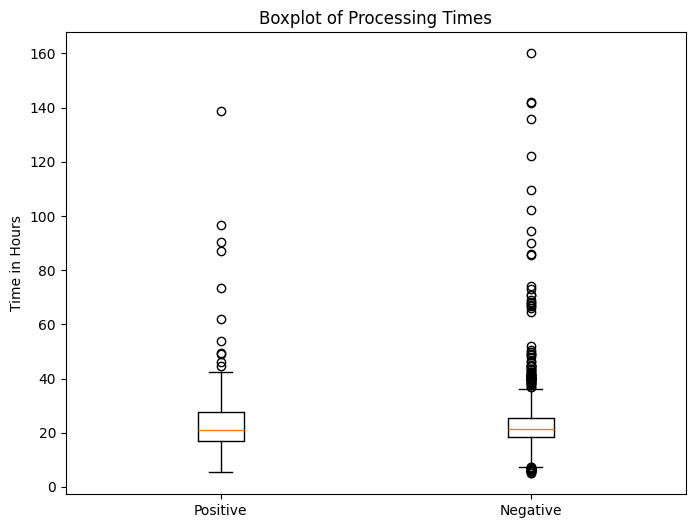

In [54]:
plt.figure(figsize=(8, 6))
plt.boxplot([positive_samples_time, negative_samples_time], labels=['Positive', 'Negative'])
plt.title('Boxplot of Processing Times')
plt.ylabel('Time in Hours')
plt.show()


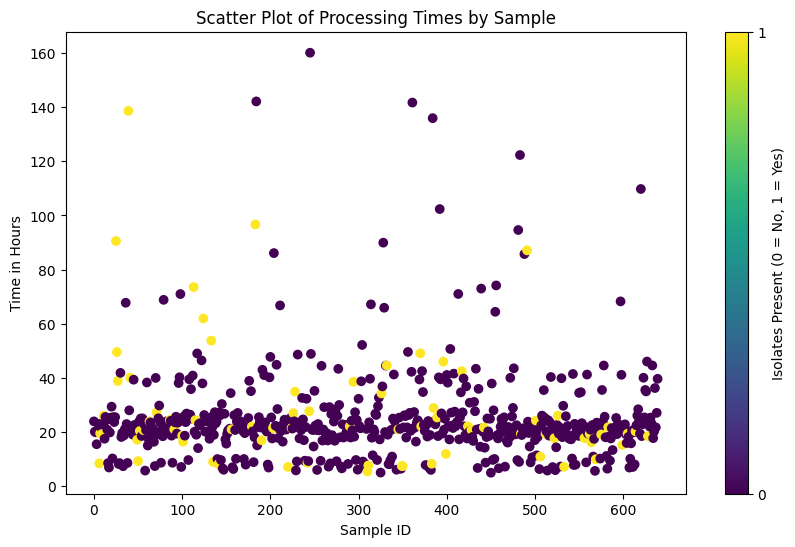

In [253]:
sample_ids = range(len(time_hours))  # Assuming sequential identifiers for samples

plt.figure(figsize=(10, 6))
plt.scatter(sample_ids, time_hours, c=contains_isolates, cmap='viridis')
plt.colorbar(ticks=[0, 1], label='Isolates Present (0 = No, 1 = Yes)')
plt.title('Scatter Plot of Processing Times by Sample')
plt.xlabel('Sample ID')
plt.ylabel('Time in Hours')
plt.show()


In [252]:
plt.figure(figsize=(8, 6))
plt.violinplot([positive_samples_time, negative_samples_time])
plt.xticks([1, 2], ['Positive', 'Negative'])
plt.title('Violin Plot of Processing Times')
plt.ylabel('Time in Hours')
plt.show()


NameError: name 'positive_samples_time' is not defined

<Figure size 800x600 with 0 Axes>

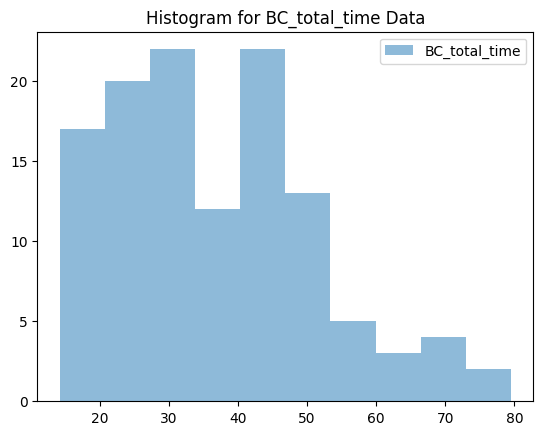

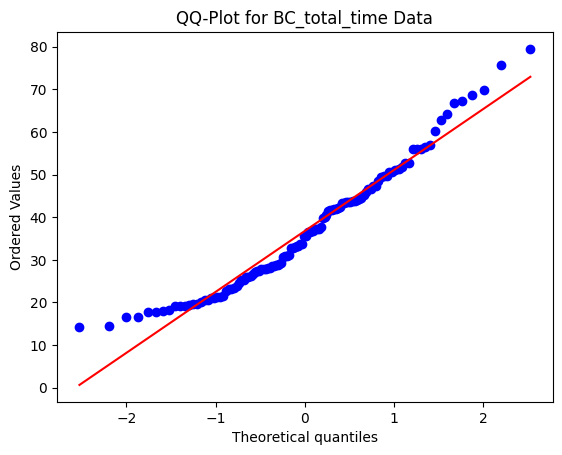

Shapiro-Wilk Test for BC_total_time Data: ShapiroResult(statistic=0.9557855725288391, pvalue=0.0005890371976420283)
Kolmogorov-Smirnov Test for BC_total_time Data: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=14.222777777777777, statistic_sign=-1)
Anderson-Darling Test for BC_total_time Data: AndersonResult(statistic=1.2912270144422706, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=36.798824074074076, scale=14.418005944087474)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


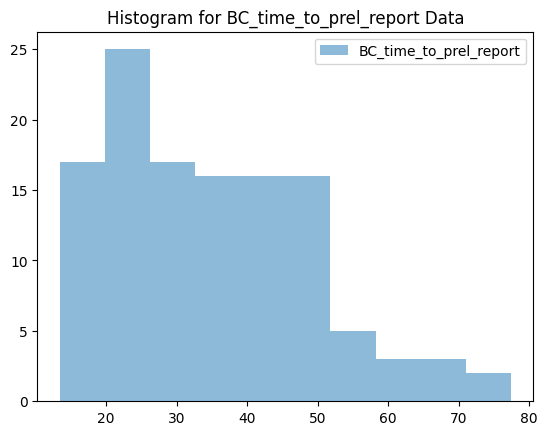

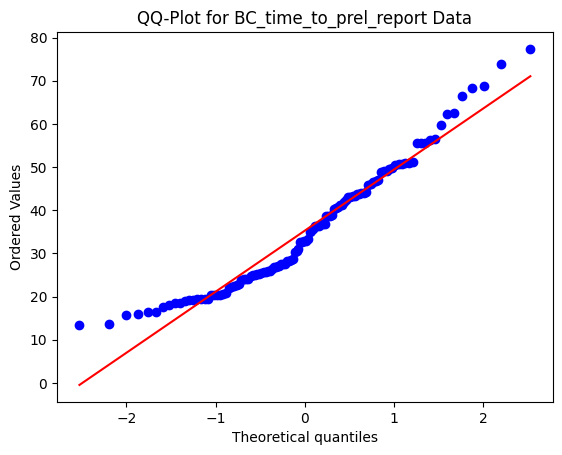

Shapiro-Wilk Test for BC_time_to_prel_report Data: ShapiroResult(statistic=0.9463666677474976, pvalue=0.00011808792623924091)
Kolmogorov-Smirnov Test for BC_time_to_prel_report Data: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=13.471111111111112, statistic_sign=-1)
Anderson-Darling Test for BC_time_to_prel_report Data: AndersonResult(statistic=1.8135066975316079, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=35.28420833333333, scale=14.33871893726263)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


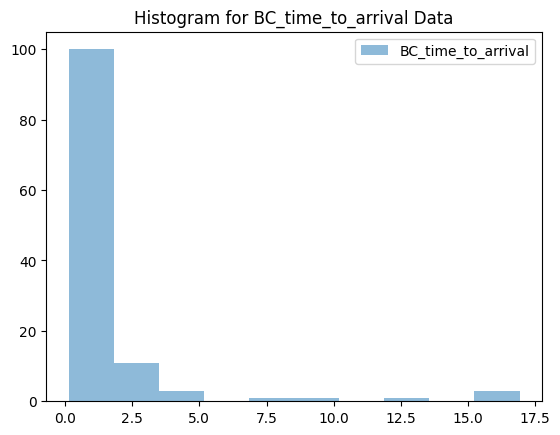

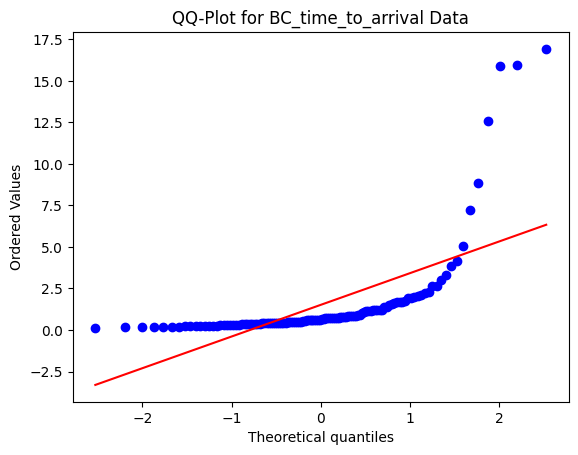

Shapiro-Wilk Test for BC_time_to_arrival Data: ShapiroResult(statistic=0.4348834156990051, pvalue=1.735183104054051e-19)
Kolmogorov-Smirnov Test for BC_time_to_arrival Data: KstestResult(statistic=0.5554449355784147, pvalue=2.3295837391945763e-35, statistic_location=0.16055555555555556, statistic_sign=-1)
Anderson-Darling Test for BC_time_to_arrival Data: AndersonResult(statistic=23.442912517911566, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.5146157407407406, scale=2.881866714369917)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


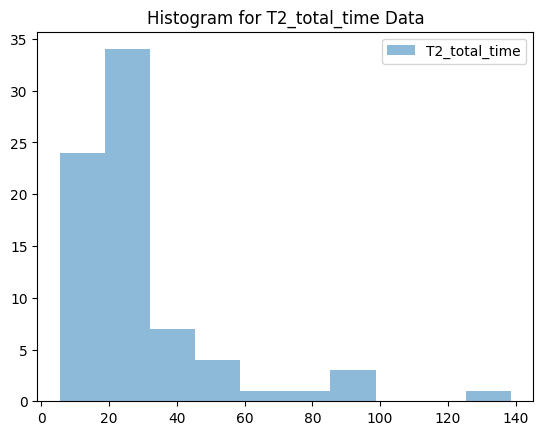

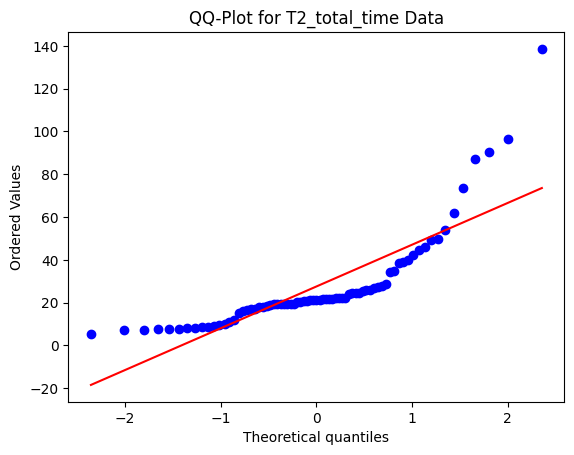

Shapiro-Wilk Test for T2_total_time Data: ShapiroResult(statistic=0.7144472002983093, pvalue=8.81250142303891e-11)
Kolmogorov-Smirnov Test for T2_total_time Data: KstestResult(statistic=0.9999999801858224, pvalue=0.0, statistic_location=5.4925, statistic_sign=-1)
Anderson-Darling Test for T2_total_time Data: AndersonResult(statistic=6.617947144786228, critical_values=array([0.549, 0.625, 0.75 , 0.875, 1.041]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=27.555744444444443, scale=22.812044487531534)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


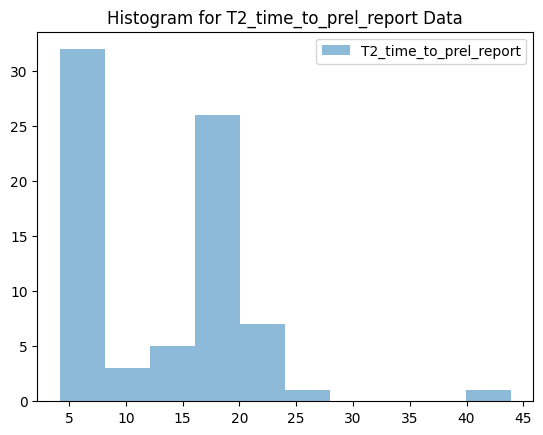

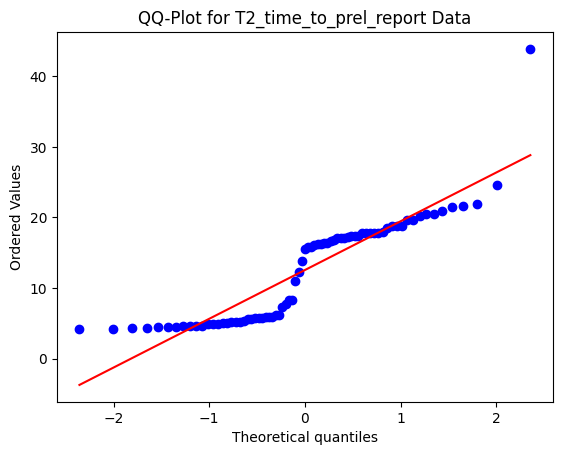

Shapiro-Wilk Test for T2_time_to_prel_report Data: ShapiroResult(statistic=0.8319957852363586, pvalue=8.816550689516589e-08)
Kolmogorov-Smirnov Test for T2_time_to_prel_report Data: KstestResult(statistic=0.9999864895616316, pvalue=0.0, statistic_location=4.197222222222222, statistic_sign=-1)
Anderson-Darling Test for T2_time_to_prel_report Data: AndersonResult(statistic=4.075170960244677, critical_values=array([0.549, 0.625, 0.75 , 0.875, 1.041]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=12.54638148148148, scale=7.448458111208578)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


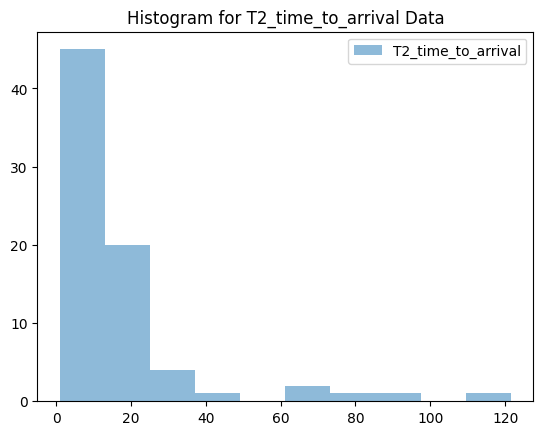

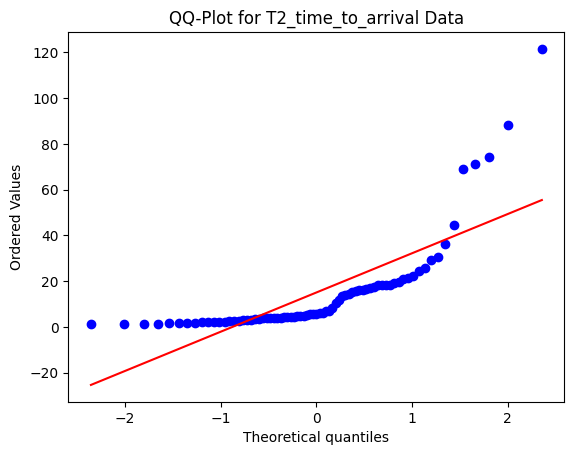

Shapiro-Wilk Test for T2_time_to_arrival Data: ShapiroResult(statistic=0.6217777729034424, pvalue=1.3328296799564043e-12)
Kolmogorov-Smirnov Test for T2_time_to_arrival Data: KstestResult(statistic=0.8910195133188612, pvalue=1.3152101371237739e-72, statistic_location=1.7244444444444444, statistic_sign=-1)
Anderson-Darling Test for T2_time_to_arrival Data: AndersonResult(statistic=9.064994496431737, critical_values=array([0.549, 0.625, 0.75 , 0.875, 1.041]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=15.009362962962966, scale=21.507993605550027)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [24]:
plotter.check_distribution("NORMAL")

## Main fig : TAT BC - T2


Stats for total_time:
      count       mean        std        min        25%        50%        75%  \
Type                                                                            
BC    120.0  36.798824  14.418006  14.222778  25.839444  35.495694  45.403542   
T2     75.0  27.555744  22.812044   5.492500  17.106806  21.042778  27.507222   

             max  
Type              
BC     79.485278  
T2    138.576111  
Outliers for total_time - T2: 11, BC: 2


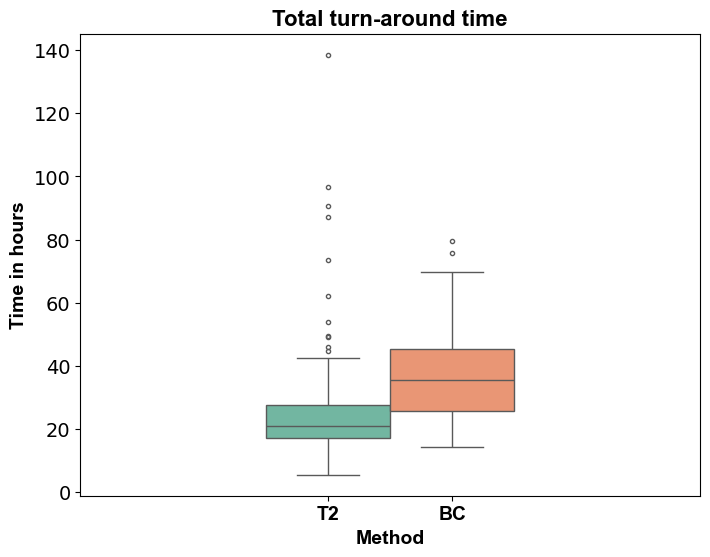


Stats for time_to_prel_report:
      count       mean        std        min        25%        50%        75%  \
Type                                                                            
BC    120.0  35.284208  14.338719  13.471111  24.048264  32.967500  44.112431   
T2     75.0  12.546381   7.448458   4.197222   5.306528  15.596944  17.780417   

            max  
Type             
BC    77.383333  
T2    43.896944  
Outliers for time_to_prel_report - T2: 1, BC: 1


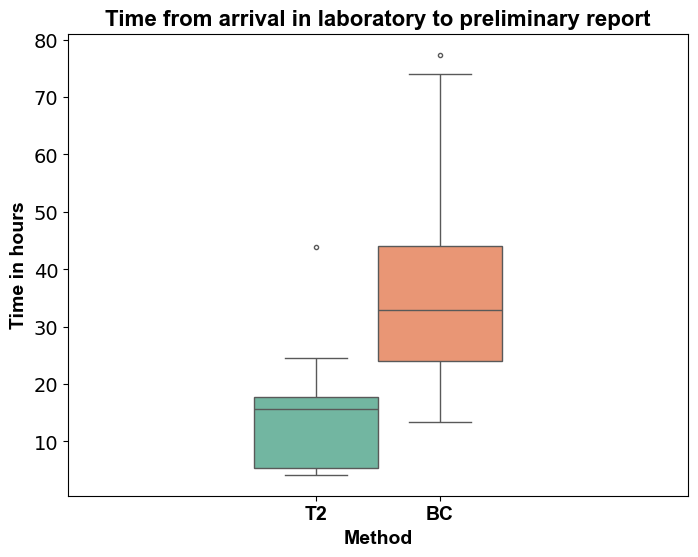


Stats for time_to_arrival:
      count       mean        std       min       25%       50%        75%  \
Type                                                                         
BC    120.0   1.514616   2.881867  0.135278  0.391042  0.636250   1.216875   
T2     75.0  15.009363  21.507994  1.008056  3.170139  5.774722  18.264722   

             max  
Type              
BC     16.918611  
T2    121.515833  
Outliers for time_to_arrival - T2: 6, BC: 13


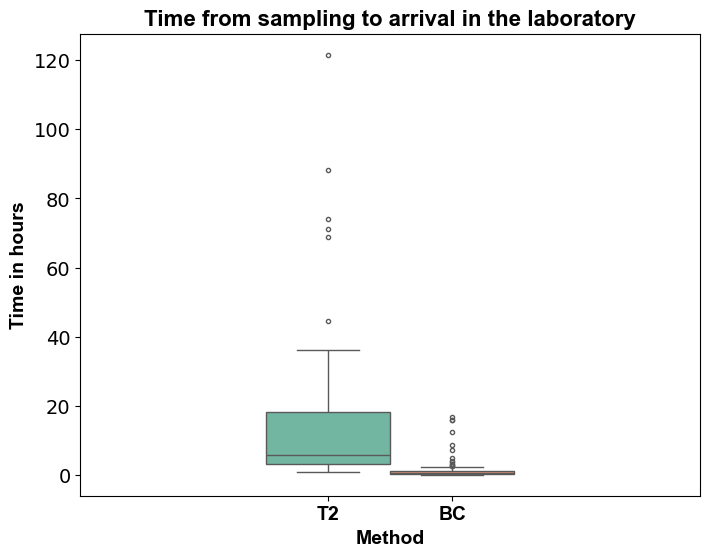

In [33]:
plot3 = plotter.tat_boxplot()

In [199]:
for i, fig in enumerate(plot3):
    Plotter.saveplot_tofile(fig, f'Fig2_subplot{i+1}',"svg")

svg
svg
svg


In [ ]:
plotter.tat_distributions()

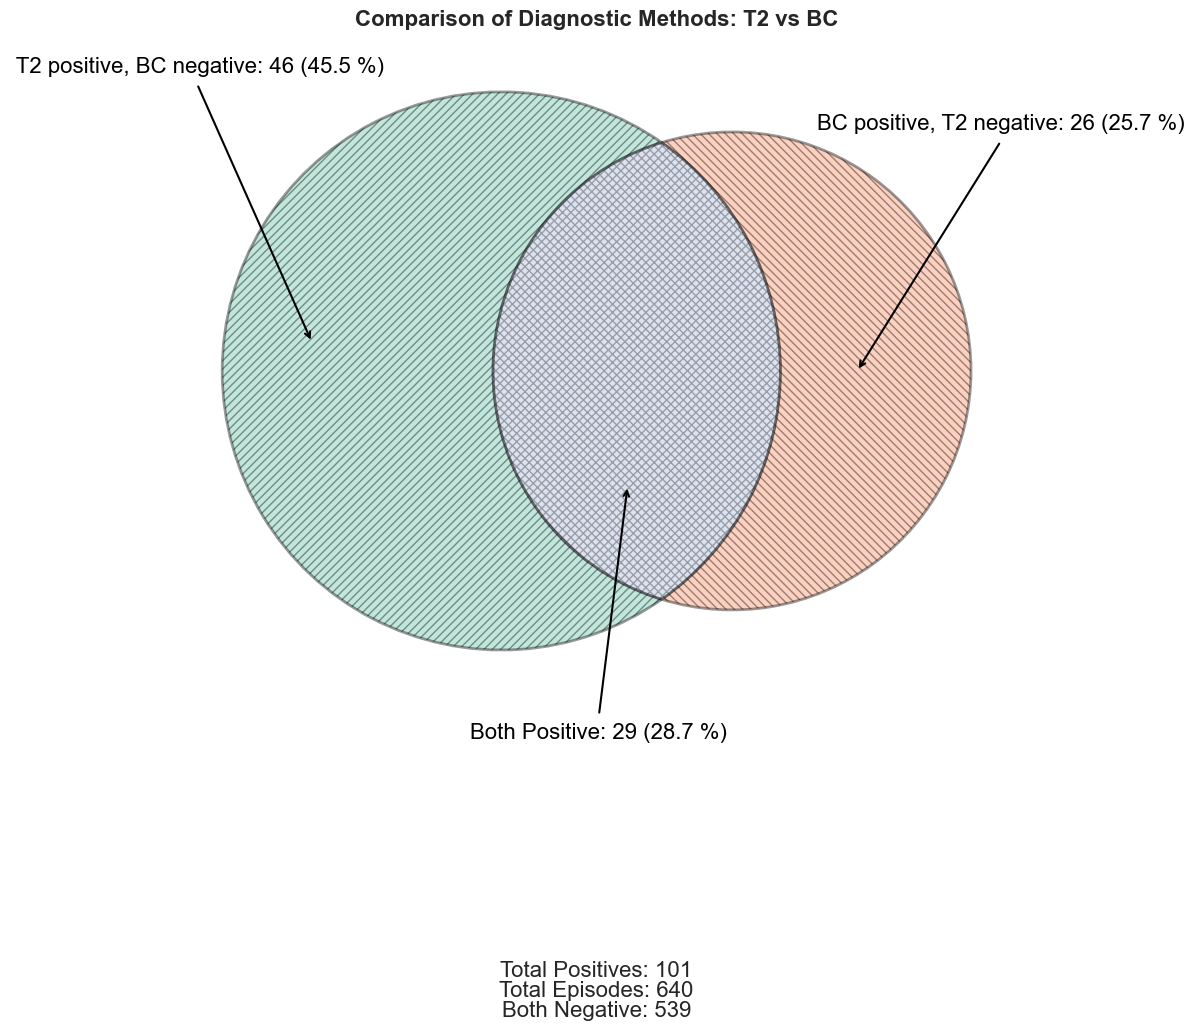

In [190]:
venn = plotter.plot_venn("BC_IN_PANEL")

In [191]:
Plotter.saveplot_tofile(venn, name = "venn_all_bc", format = "svg")

svg


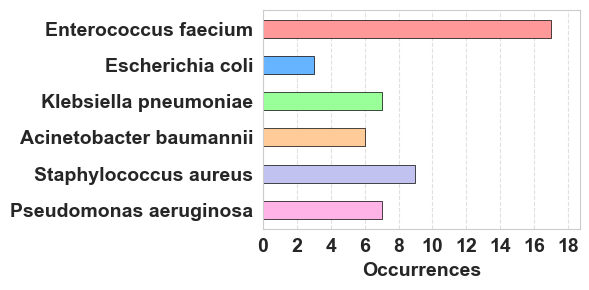

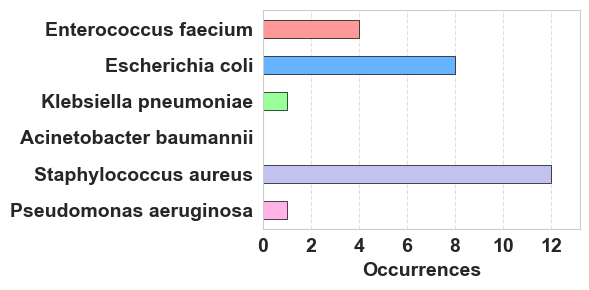

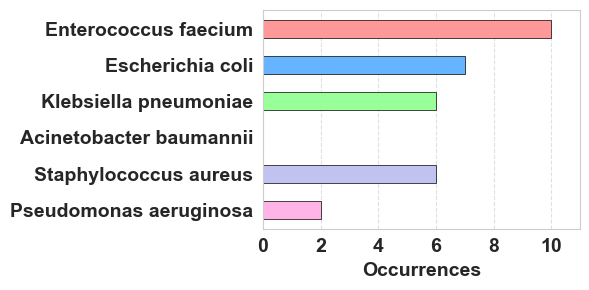

In [197]:
venn_legend = plotter.plot_bacteria_occurrences()

In [198]:
for i, fig in enumerate(venn_legend):
    Plotter.saveplot_tofile(fig, f'Venn_legend{i+1}',"svg")

svg
svg
svg


2117


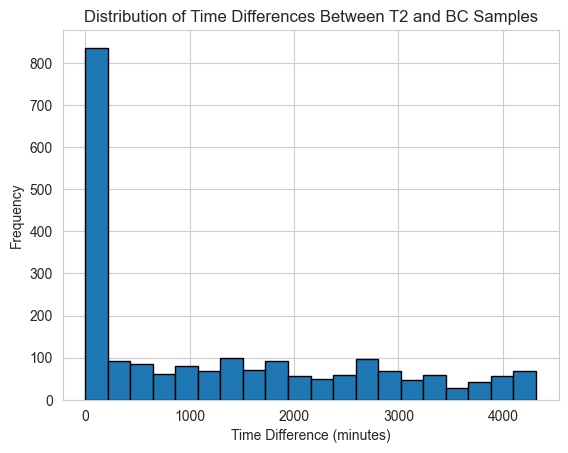

In [131]:
plotter.show_time_between_BC_T2()

## Main Fig: weekdays etc
 


Mann-Whitney U test between weekdays and weekends:
U-statistic: 22206.5 P-value: 3.448294686476885e-05
Weekdays: count    528.000000
mean      23.720827
std       15.842206
min        5.023333
25%       18.022153
50%       21.166389
75%       25.095486
max      142.071667
Name: turnaround_time, dtype: float64
Weekends: count    112.000000
mean      31.611877
std       25.099750
min        5.073611
25%       20.225972
50%       23.974444
75%       39.507569
max      160.050556
Name: turnaround_time, dtype: float64
Mann-Whitney U test between '8-16' and '16-08' duty statuses:
U-statistic: 55198.0 P-value: 0.012552583265782305
'8-16' duty status: count    379.000000
mean      25.392796
std       17.458035
min        5.073611
25%       19.718472
50%       21.762222
75%       25.025417
max      160.050556
Name: turnaround_time, dtype: float64
'16-08' duty status: count    261.000000
mean      24.679146
std       18.878227
min        5.023333
25%       10.993056
50%       20.257222
75%      

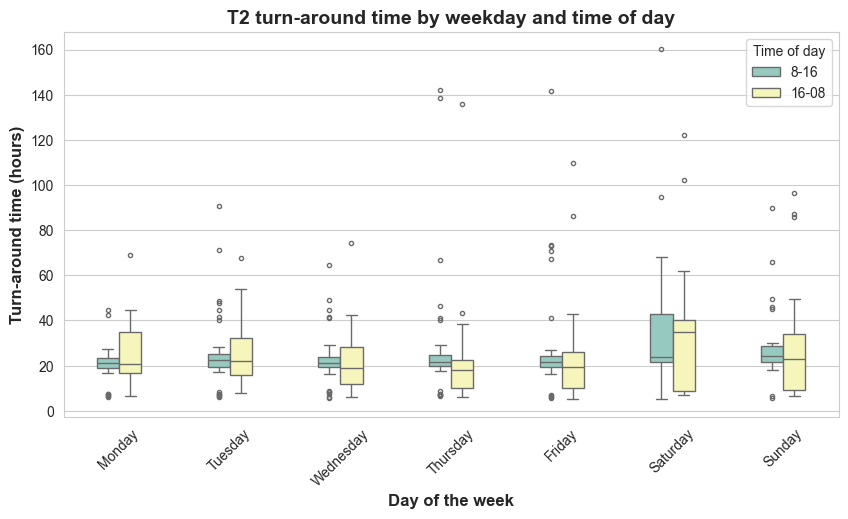

In [161]:
tat_duty = plotter.plot_tat_by_time(sample_type="t2", time_type="arrival", result_category="all")

In [162]:
tat_duty.savefig("tat_duty1.svg", format = "svg", bbox_inches = 'tight')

In [129]:
Plotter.saveplot_tofile(tat_duty, name="tat_duty", format = "svg")

TypeError: Plotter.saveplot_tofile() got an unexpected keyword argument 'dpi'

In [335]:
type(tat_duty)

matplotlib.figure.Figure

In [ ]:
plot_2 = plotter.plot_longitudinal(positive=True) 

In [ ]:
print(type(plot_2))

In [ ]:
Plotter.saveplot_tofile(plot_2, "Fig2")

In [ ]:
plotter.plot_longitudinal(positive=False)

In [ ]:
displayer.tat_differences(4, "ARRIVAL")

In [ ]:
displayer.tat_df()